# Sales Analysis 

In [ ]:
# Sales analysis for a data set that has time, date, state wise reports of sales and units.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Data Wrangling

In [3]:
df = pd.read_excel('Project-Python-Sales Analysis.xlsx')
df.head()

,Date,Time,State,Group,Unit,Sales
0,2020-10-01,Morning,WA,Kids,8,20000
1,2020-10-01,Morning,WA,Men,8,20000
2,2020-10-01,Morning,WA,Women,4,10000
3,2020-10-01,Morning,WA,Seniors,15,37500
4,2020-10-01,Afternoon,WA,Kids,3,7500


In [4]:
missing_values = df.isna().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64


In [ ]:
#there is no missing values, so no worry about handling them or replacing them with mean values

In [6]:
df['sales_normalized'] = (df['Sales'] - df['Sales'].min()) / (df['Sales'].max() - df['Sales'].min())

In [7]:
group_state_sales = df.groupby(['Group', 'State'])['Sales'].sum()
print("\nSales by Group and State:")
print(group_state_sales)


Sales by Group and State:
Group     State
 Kids      NSW     18587500
           NT       5700000
           QLD      8510000
           SA      14515000
           TAS      5775000
           VIC     26360000
           WA       5625000
 Men       NSW     19022500
           NT       5762500
           QLD      8392500
           SA      14655000
           TAS      5757500
           VIC     26407500
           WA       5752500
 Seniors   NSW     18187500
           NT       5465000
           QLD      8190000
           SA      14717500
           TAS      5650000
           VIC     26315000
           WA       5512500
 Women     NSW     19172500
           NT       5652500
           QLD      8325000
           SA      14970000
           TAS      5577500
           VIC     26482500
           WA       5262500
Name: Sales, dtype: int64


# Data Analysis

In [10]:
sales_stats = df[['Sales', 'Unit']].describe()
print("\nDescriptive Statistics:")
print(sales_stats)


Descriptive Statistics:
               Sales         Unit
count    7560.000000  7560.000000
mean    45013.558201    18.005423
std     32253.506944    12.901403
min      5000.000000     2.000000
25%     20000.000000     8.000000
50%     35000.000000    14.000000
75%     65000.000000    26.000000
max    162500.000000    65.000000


In [11]:
highest_sales_group = df.groupby('Group')['Sales'].sum().idxmax()
lowest_sales_group = df.groupby('Group')['Sales'].sum().idxmin()
print("\nGroup having the highest sales:", highest_sales_group)
print("Group having the lowest sales:", lowest_sales_group)



Group having the highest sales:  Men
Group having the lowest sales:  Seniors


In [12]:
highest_sales_state = df.groupby('State')['Sales'].sum().idxmax()
lowest_sales_state = df.groupby('State')['Sales'].sum().idxmin()
print("\nState having the highest sales:", highest_sales_state)
print("State having the lowest sales:", lowest_sales_state)


State having the highest sales:  VIC
State having the lowest sales:  WA


In [15]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [20]:
weekly_sales = df.resample('W').sum()
monthly_sales = df.resample('M').sum()
quarterly_sales = df.resample('Q').sum()
print(weekly_sales)
print(monthly_sales)
print(quarterly_sales)

             Unit     Sales  sales_normalized
Date                                         
2020-10-04   6018  15045000         84.857143
2020-10-11  10801  27002500        152.777778
2020-10-18  10656  26640000        150.476190
2020-10-25  10726  26815000        151.587302
2020-11-01   8723  21807500        122.460317
2020-11-08   8346  20865000        113.809524
2020-11-15   8469  21172500        115.761905
2020-11-22   8445  21112500        115.380952
2020-11-29   8591  21477500        117.698413
2020-12-06  11849  29622500        169.412698
2020-12-13  12610  31525000        181.492063
2020-12-20  12662  31655000        182.317460
2020-12-27  12708  31770000        183.047619
2021-01-03   5517  13792500         79.571429
             Unit      Sales  sales_normalized
Date                                          
2020-10-31  45716  114290000        645.650794
2020-11-30  36273   90682500        495.761905
2020-12-31  54132  135330000        779.238095
              Unit      Sales

In [22]:
weekly_sales.to_csv('weekly_sales.csv', index=False)
monthly_sales.to_csv('monthly_sales.csv', index=False)
quarterly_sales.to_csv('quarterly_sales.csv', index=False)

# Data Visualization

In [ ]:
# State wise sales analysis for different groups

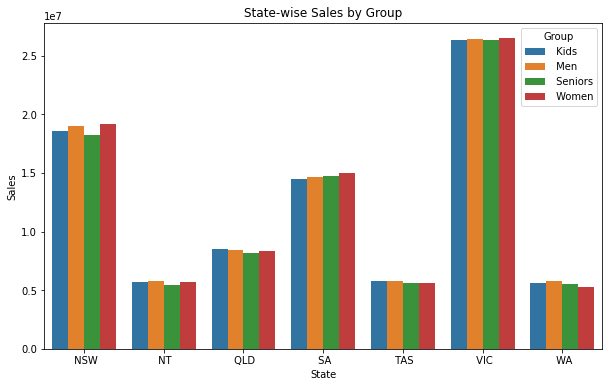

In [23]:
state_group_sales = df.groupby(['State', 'Group'])['Sales'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='State', y='Sales', hue='Group', data=state_group_sales)
plt.title("State-wise Sales by Group")
plt.xlabel("State")
plt.ylabel("Sales")
plt.legend(title='Group')
plt.show()

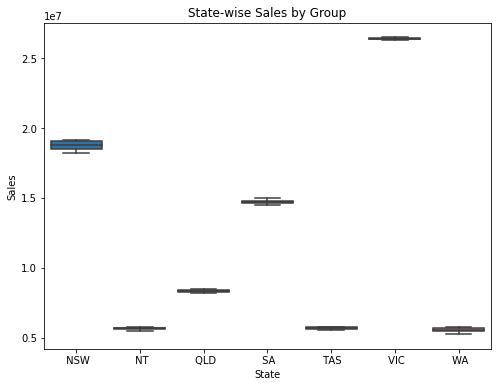

In [26]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='State', y='Sales', data=state_group_sales)
plt.title('State-wise Sales by Group')
plt.xlabel('State')
plt.ylabel('Sales')
plt.show()

In [ ]:
# Group wise sales analysis across different states

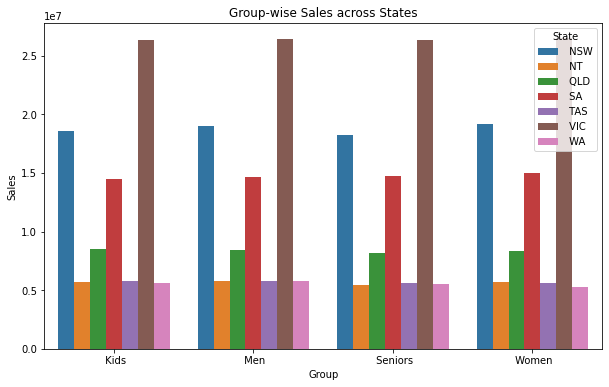

In [27]:
group_state_sales = df.groupby(['Group', 'State'])['Sales'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Group', y='Sales', hue='State', data=group_state_sales)
plt.title("Group-wise Sales across States")
plt.xlabel("Group")
plt.ylabel("Sales")
plt.legend(title='State')
plt.show()

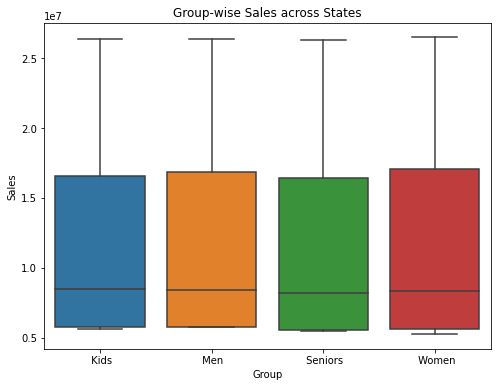

In [28]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Group', y='Sales', data=group_state_sales)
plt.title('Group-wise Sales across States')
plt.xlabel('Group')
plt.ylabel('Sales')
plt.show()

In [ ]:
# Time of the day analysis

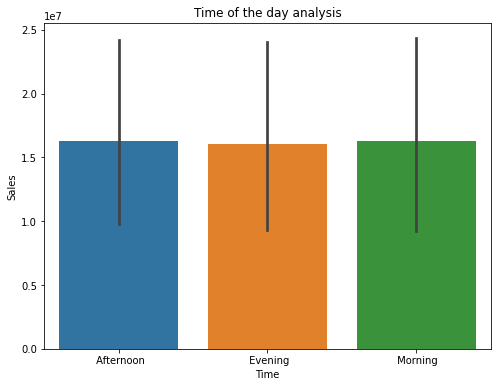

In [35]:
time_state_sales = df.groupby(['Time', 'State'])['Sales'].sum().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x='Time', y='Sales', data=time_state_sales)
plt.title('Time of the day analysis')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.show()

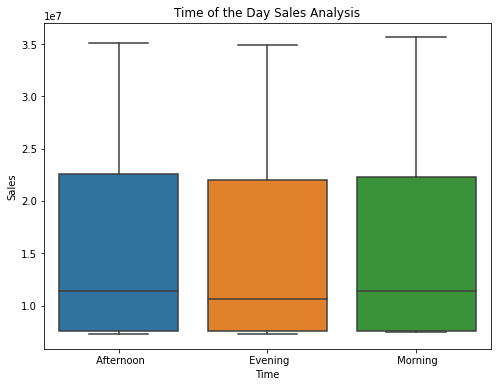

In [36]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Time', y='Sales', data=time_state_sales)
plt.title('Time of the Day Sales Analysis')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.show()

In [33]:
highest_sales_Time = df.groupby('Time')['Sales'].sum().idxmax()
lowest_sales_Time = df.groupby('Time')['Sales'].sum().idxmin()
print("\nTime having the highest sales:", highest_sales_Time)
print("Time having the lowest sales:", lowest_sales_Time)


Time having the highest sales:  Morning
Time having the lowest sales:  Evening


In [ ]:
# Bar plots are useful for comparing categories or groups. They allow us to visualize and compare the values of a variable across different categories by representing the data as rectangular bars.

In [ ]:
# Box plots provide a compact visualization of the distribution and summary statistics of a continuous variable. They display the median, quartiles, and potential outliers of the data.